In [1]:
import child_model as CM
import controller as C
import utils as U
import data as D
import endgame as E 

import torch
import torch.optim as optim
import torch.nn.functional as F

import os

%load_ext autoreload
%autoreload 2

In [2]:
#load data
cifar10 = D.CIFAR10(augment=False, batch_size=30, test_batch_size=50)    

Files already downloaded and verified


Load child model checkpoint

In [3]:
#outputs: ['enas_feedback_run1', 'fully_connected_N=8_M=500_lr=.005', ... ] 
os.listdir('../saved/') 

['long_enas_run1', 'enas_feedback_run1', 'fully_connected_N=8_M=500_lr=.005']

In [4]:
checkpoint = 'enas_feedback_run1'

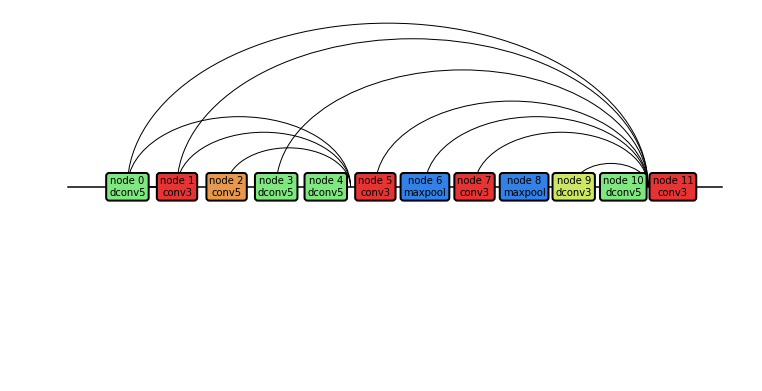

Best acc: 1.04


In [6]:
child = E.pick_best_from_checkpoint(checkpoint, weight_init='nudge')

In [7]:
accuracy = E.test_child(child, cifar10.test)    
print('Best child has accuracy ', accuracy)    

10000
Testing child model.
testing time = 6s
Best child has accuracy  0.1714


In [8]:
optimizer = optim.SGD(
    child.parameters(), lr = 1e-6, momentum=0.8
)
loss = F.cross_entropy
E.train_child(child, cifar10.train, optimizer, loss, epochs=5)   

Epoch  0  /  5
Train [0/50010 (0%)]	Loss: 3.387851, Time: 0.106
Train [3000/50010 (6%)]	Loss: 1.988406, Time: 4.711
Train [6000/50010 (12%)]	Loss: 2.014063, Time: 9.307
Train [9000/50010 (18%)]	Loss: 1.668351, Time: 14.151
Train [12000/50010 (24%)]	Loss: 2.352530, Time: 18.909
Train [15000/50010 (30%)]	Loss: 1.857544, Time: 23.832
Train [18000/50010 (36%)]	Loss: 2.096654, Time: 29.507
Train [21000/50010 (42%)]	Loss: 2.056653, Time: 35.571
Train [24000/50010 (48%)]	Loss: 1.676712, Time: 41.347
Train [27000/50010 (54%)]	Loss: 2.352131, Time: 47.225
Train [30000/50010 (60%)]	Loss: 2.156223, Time: 52.828
Train [33000/50010 (66%)]	Loss: 1.997593, Time: 58.073
Train [36000/50010 (72%)]	Loss: 1.518954, Time: 62.820
Train [39000/50010 (78%)]	Loss: 1.909466, Time: 68.000
Train [42000/50010 (84%)]	Loss: 2.139287, Time: 73.193
Train [45000/50010 (90%)]	Loss: 1.749919, Time: 78.426
Train [48000/50010 (96%)]	Loss: 1.762934, Time: 83.611
Epoch  1  /  5
Train [0/50010 (0%)]	Loss: 1.777480, Time: 0.12

In [9]:
accuracy = E.test_child(child, cifar10.test)    
print('Best child has accuracy ', accuracy)    

10000
Testing child model.
testing time = 5s
Best child has accuracy  0.3999
